# CLUSTERING ANALYSIS 

In [1]:
import pandas as pd

df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Preprocessing the dataset to handle missing values, remove outliers, and scale the features if necessary.
# Descriptive Statistics

In [2]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
#checking null values
# handiling missing data
missing_values = df.isnull().sum()
missing_values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

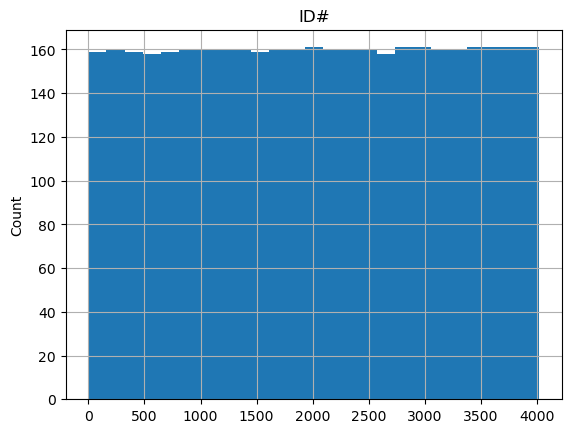

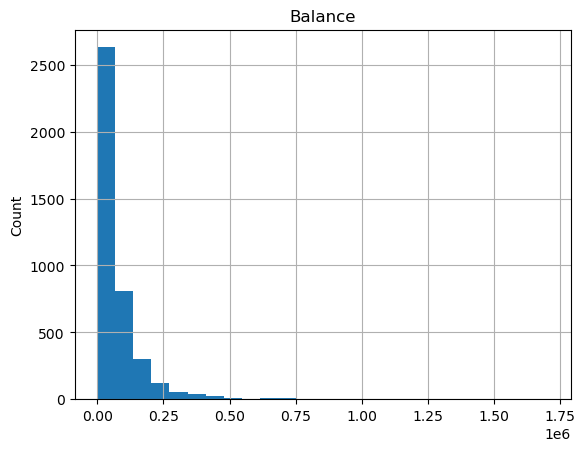

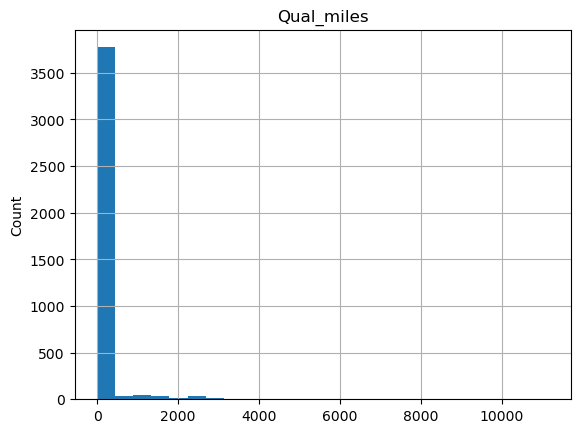

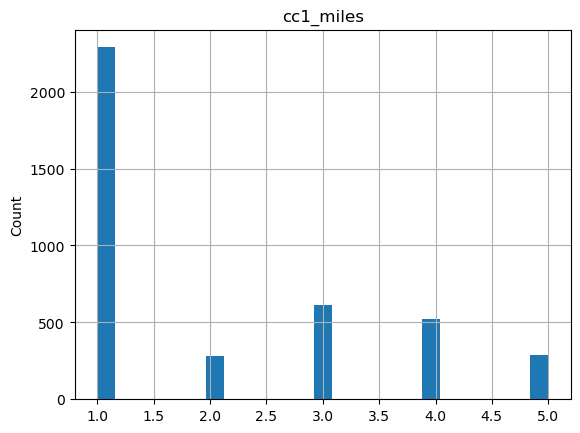

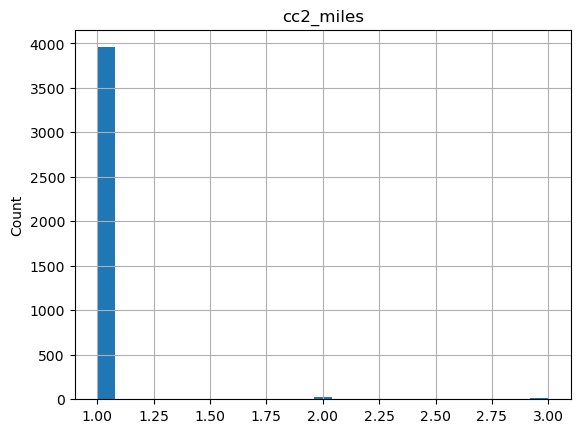

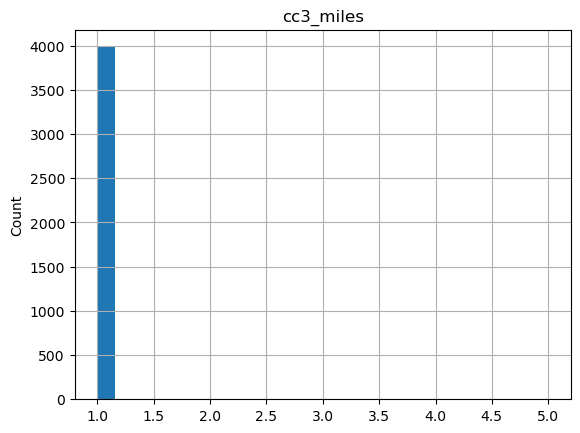

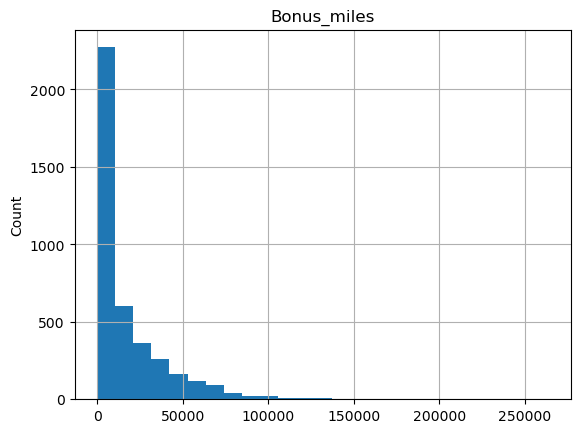

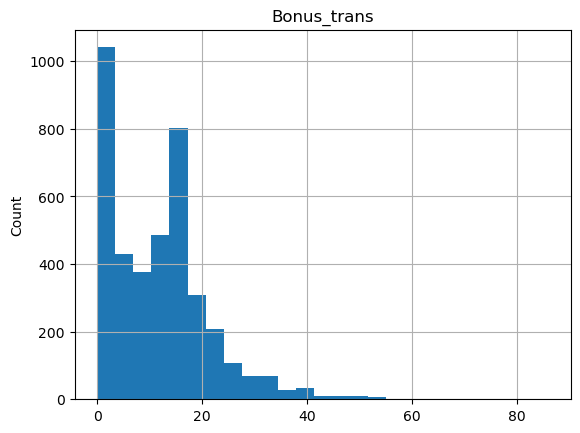

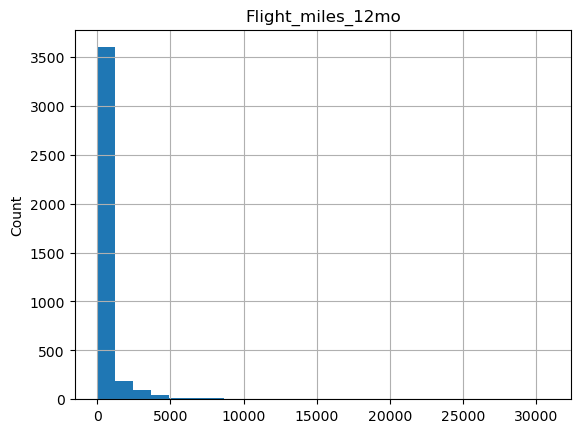

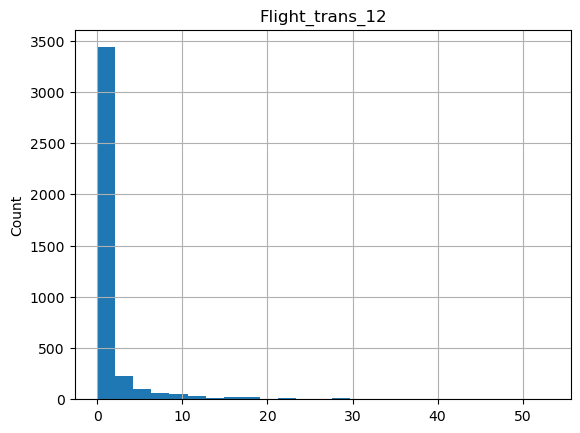

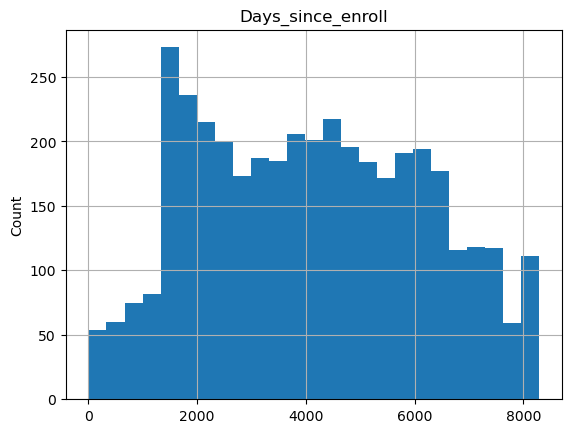

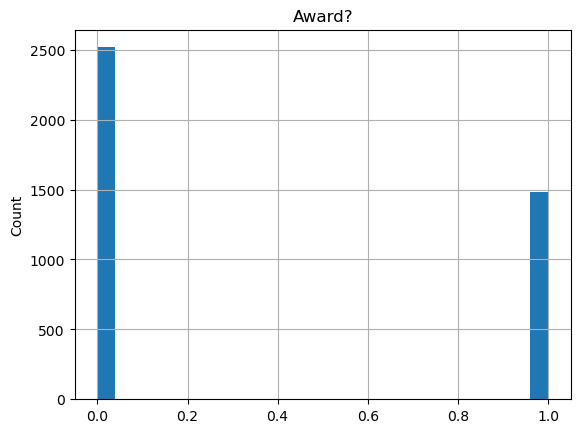

In [5]:
import matplotlib.pyplot as plt

for feature in df.columns:
    df=df.copy()
    df[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

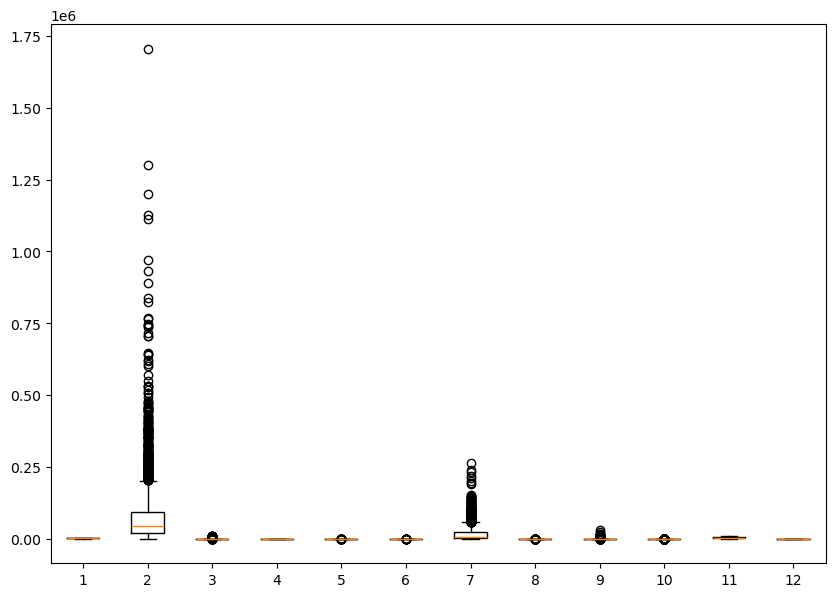

In [6]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df)
plt.show()

ID#


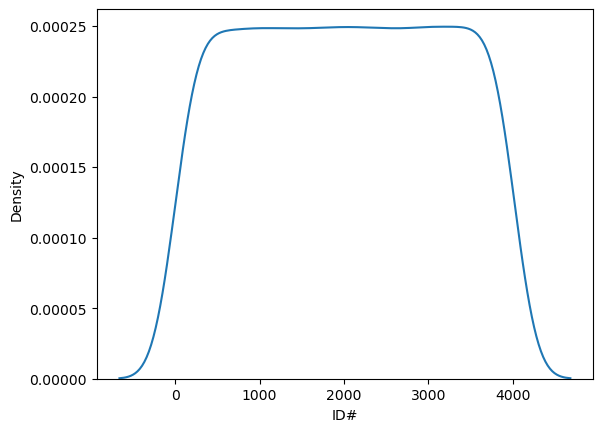

Balance


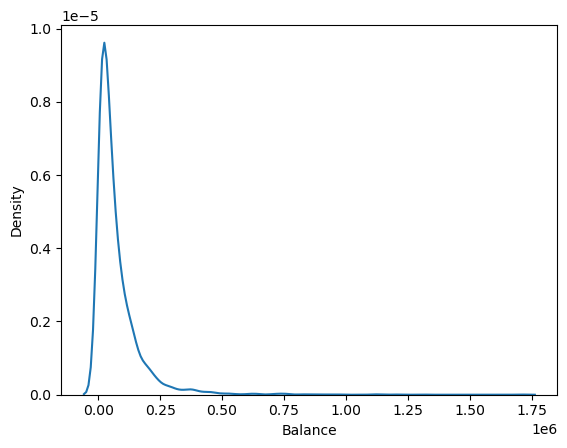

Qual_miles


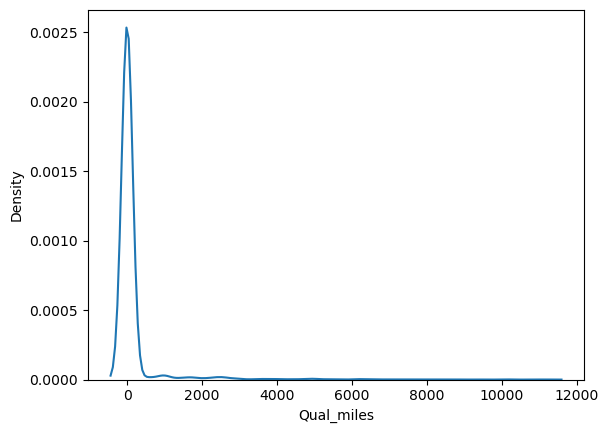

cc1_miles


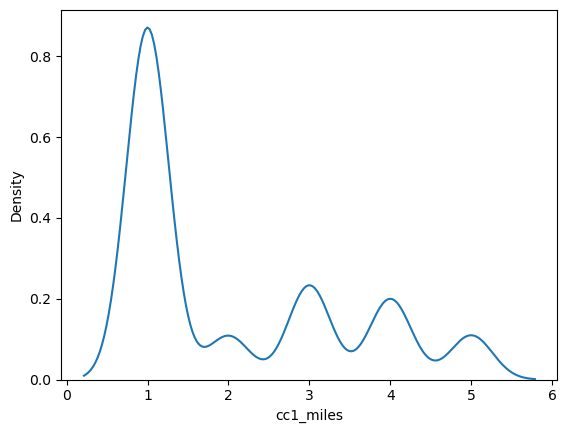

cc2_miles


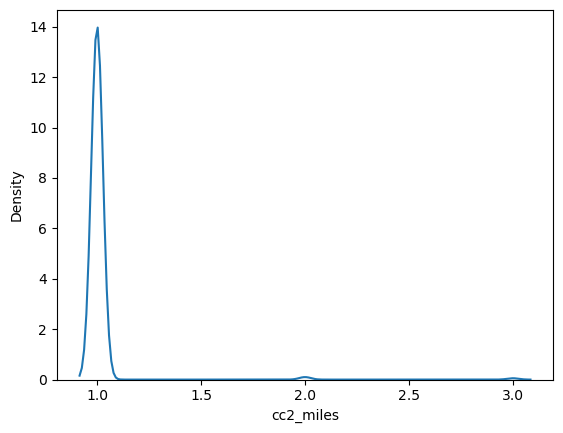

cc3_miles


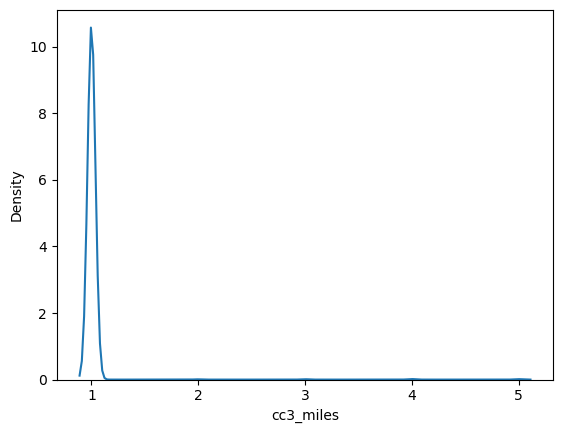

Bonus_miles


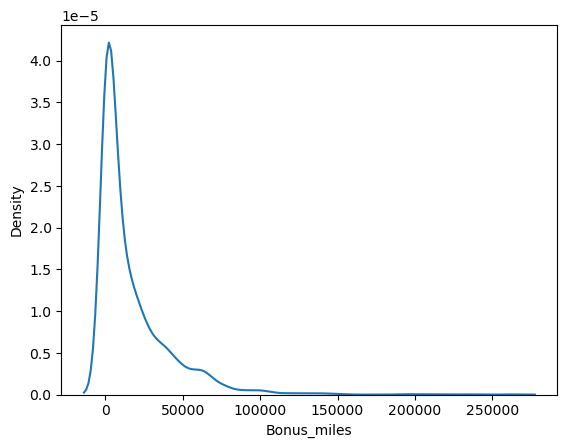

Bonus_trans


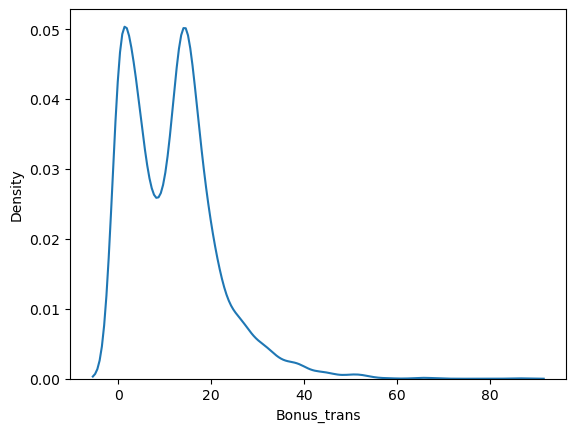

Flight_miles_12mo


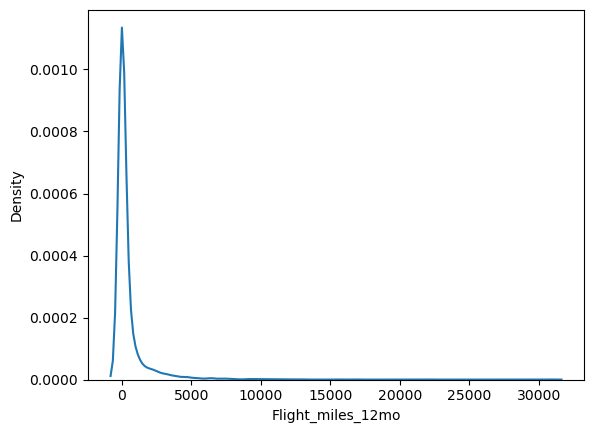

Flight_trans_12


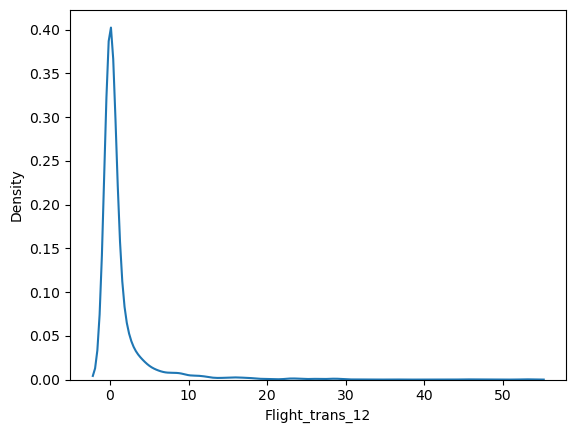

Days_since_enroll


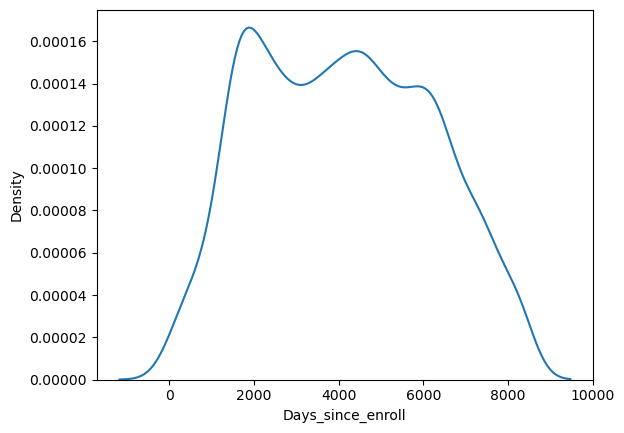

Award?


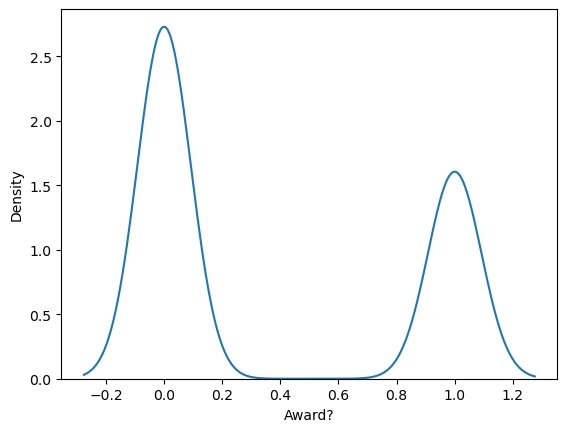

In [7]:
#  Density for every feature
import seaborn as sns
for n in df.columns:
    print(n)
    sns.kdeplot(df[n])
    plt.show()

# K-Means Clustering

C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans

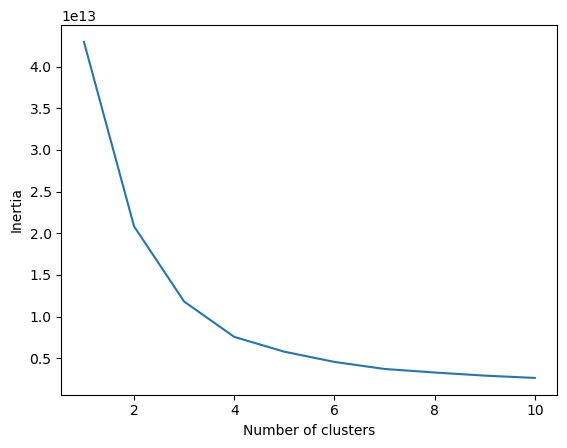

C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels:
[2 2 2 ... 0 2 2]

Cluster centers:
[[1.83071966e+03 9.29147008e+04 1.66446849e+02 2.78174976e+00
  1.01034807e+00 1.02822201e+00 2.73235851e+04 1.53123236e+01
  5.90667921e+02 1.75634995e+00 4.47075165e+03 4.19567262e-01]
 [9.89545455e+02 8.84040636e+05 6.05909091e+02 3.22727273e+00
  1.00000000e+00 1.13636364e+00 5.66431364e+04 2.16363636e+01
  1.94513636e+03 6.77272727e+00 6.24777273e+03 8.63636364e-01]
 [2.22417654e+03 2.52630704e+04 1.00025514e+02 1.53251029e+00
  1.01728395e+00 1.00452675e+00 8.23700082e+03 8.56625514e+00
  2.52667490e+02 7.90123457e-01 3.72311276e+03 3.11934156e-01]
 [1.07452000e+03 3.95594640e+05 4.03420000e+02 3.35000000e+00
  1.03000000e+00 1.00000000e+00 5.23201400e+04 1.99100000e+01
  1.40641000e+03 4.49000000e+00 5.89290000e+03 7.30000000e-01]
 [1.50322135e+03 1.95744174e+05 2.67309896e+02 2.99218750e+00
  1.00520833e+00 1.01302083e+00 3.39145677e+04 1.78020833e+01
  1.07934115e+03 2.88541667e+00 5.06199219e+03 4.81770833e-01]]


In [8]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(df)
  inertia.append(km.inertia_)

# Plot the elbow curve
import matplotlib.pyplot as plt

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters based on the elbow curve
num_clusters = 5

# Apply K-Means clustering with the chosen number of clusters
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(df)

# Get cluster labels for each data point
labels = km.labels_

# Get cluster centers
centers = km.cluster_centers_

# Print cluster labels and centers
print('Cluster labels:')
print(labels)
print('\nCluster centers:')
print(centers)

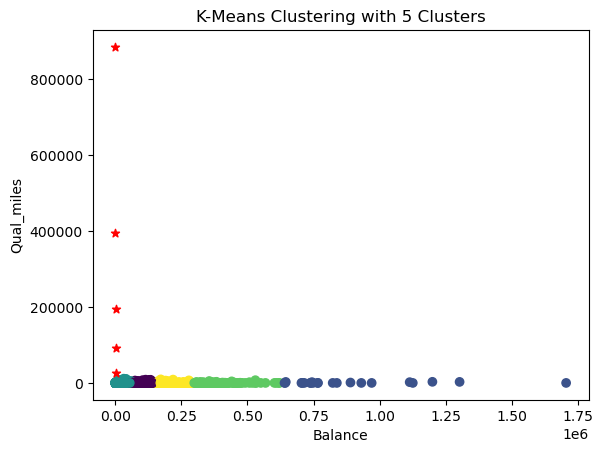

In [9]:
# Visualize the clusters
plt.scatter(df['Balance'], df['Qual_miles'], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', color='red')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.title('K-Means Clustering with {} Clusters'.format(num_clusters))
plt.show()

# Hierarchical Clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering

# Apply hierarchical clustering with different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
  hc = AgglomerativeClustering(linkage=method)
  hc.fit(df)

  # Get cluster labels for each data point
  labels = hc.labels_

  # Print cluster labels
  print('Cluster labels for linkage method {}:'.format(method))
  print(labels)

Cluster labels for linkage method ward:
[1 1 1 ... 1 1 1]
Cluster labels for linkage method complete:
[0 0 0 ... 0 0 0]
Cluster labels for linkage method average:
[0 0 0 ... 0 0 0]
Cluster labels for linkage method single:
[0 0 0 ... 0 0 0]


# DBSCAN Clustering

In [11]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering with different epsilon values
epsilon_values = [0.5, 1.0, 1.5, 2.0]

for epsilon in epsilon_values:
  dbscan = DBSCAN(eps=epsilon)
  dbscan.fit(df)

  # Get cluster labels for each data point
  labels = dbscan.labels_

  # Print cluster labels
  print('Cluster labels for epsilon {}:'.format(epsilon))
  print(labels)

Cluster labels for epsilon 0.5:
[-1 -1 -1 ... -1 -1 -1]
Cluster labels for epsilon 1.0:
[-1 -1 -1 ... -1 -1 -1]
Cluster labels for epsilon 1.5:
[-1 -1 -1 ... -1 -1 -1]
Cluster labels for epsilon 2.0:
[-1 -1 -1 ... -1 -1 -1]


In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
import numpy as np

# Assume df is your dataset and epsilon_values is a list of epsilon values for DBSCAN
# For DBSCAN, you should specify the minimum samples parameter (min_samples)

# Evaluate K-Means clustering using silhouette score
k_values = range(2, 11)  # Assuming you want to try K from 2 to 10
kmeans_silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_score_kmeans = silhouette_score(df, labels)
    kmeans_silhouette_scores.append(silhouette_score_kmeans)

print('K-Means silhouette scores:')
for k, score in zip(k_values, kmeans_silhouette_scores):
    print(f'Clusters: {k}, Silhouette Score: {score}')

# Evaluate DBSCAN clustering using silhouette score
dbscan_silhouette_scores = []
min_samples_values = [5, 10, 15]  # You may adjust these values as needed

for epsilon in epsilon_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        labels = dbscan.fit_predict(df)
        if len(np.unique(labels)) > 1:  # Ensure at least two clusters for silhouette score
            silhouette_score_dbscan = silhouette_score(df, labels)
            dbscan_silhouette_scores.append((epsilon, min_samples, silhouette_score_dbscan))

print('DBSCAN silhouette scores:')
for epsilon, min_samples, score in dbscan_silhouette_scores:
    print(f'Epsilon: {epsilon}, Min Samples: {min_samples}, Silhouette Score: {score}')

C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans

K-Means silhouette scores:
Clusters: 2, Silhouette Score: 0.7417389972205697
Clusters: 3, Silhouette Score: 0.6493060301677293
Clusters: 4, Silhouette Score: 0.5896237475588169
Clusters: 5, Silhouette Score: 0.5416139240011574
Clusters: 6, Silhouette Score: 0.5147223248155344
Clusters: 7, Silhouette Score: 0.4738881621569599
Clusters: 8, Silhouette Score: 0.46785838049721284
Clusters: 9, Silhouette Score: 0.4371059539927545
Clusters: 10, Silhouette Score: 0.45138198520161854
DBSCAN silhouette scores:
